# 設定model

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

# 從mnist 載入資料
訓練 5個 epoch

In [4]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 13s 4ms/step - loss: 0.1590 - accuracy: 0.9505
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0440 - accuracy: 0.9869
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0313 - accuracy: 0.9905
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0232 - accuracy: 0.9928
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0194 - accuracy: 0.9942


# 查看準確率

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0250 - accuracy: 0.9928
Test accuracy: 0.993


# 設定一個新的model

In [6]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

#從kaggle 下載貓與狗的資料

In [14]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wuyishun","key":"9ffcb0d7b87712548d2bd18a18162046"}'}

In [15]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [16]:
!kaggle competitions download -c dogs-vs-cats

 98% 794M/812M [00:03<00:00, 265MB/s]
100% 812M/812M [00:03<00:00, 275MB/s]


In [19]:
!unzip -qq train.zip

#讀取資料

In [20]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("/content/cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

#設定 model

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [22]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [23]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [24]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [25]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [26]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [27]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [28]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [29]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


#進行訓練

In [30]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 87ms/step - loss: 0.7239 - accuracy: 0.5195 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 5s 75ms/step - loss: 0.6983 - accuracy: 0.5370 - val_loss: 0.6807 - val_accuracy: 0.5770
Epoch 3/30
63/63 [==============================] - 7s 115ms/step - loss: 0.6838 - accuracy: 0.5770 - val_loss: 0.6723 - val_accuracy: 0.5730
Epoch 4/30
63/63 [==============================] - 5s 75ms/step - loss: 0.6493 - accuracy: 0.6490 - val_loss: 0.6395 - val_accuracy: 0.6340
Epoch 5/30
63/63 [==============================] - 5s 74ms/step - loss: 0.5990 - accuracy: 0.6890 - val_loss: 0.6619 - val_accuracy: 0.6680
Epoch 6/30
63/63 [==============================] - 5s 73ms/step - loss: 0.5571 - accuracy: 0.7065 - val_loss: 0.6726 - val_accuracy: 0.6560
Epoch 7/30
63/63 [==============================] - 5s 74ms/step - loss: 0.5325 - accuracy: 0.7445 - val_loss: 0.7401 - val_accuracy: 0.6730
Epoch 8/30
6

#查看訓練結果

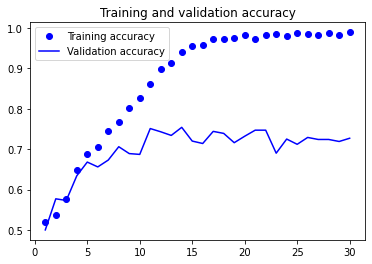

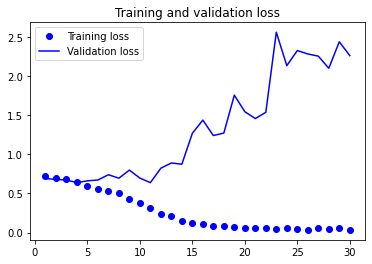

In [31]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [32]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 38ms/step - loss: 0.6289 - accuracy: 0.7415
Test accuracy: 0.742


In [33]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

#查看圖片內容

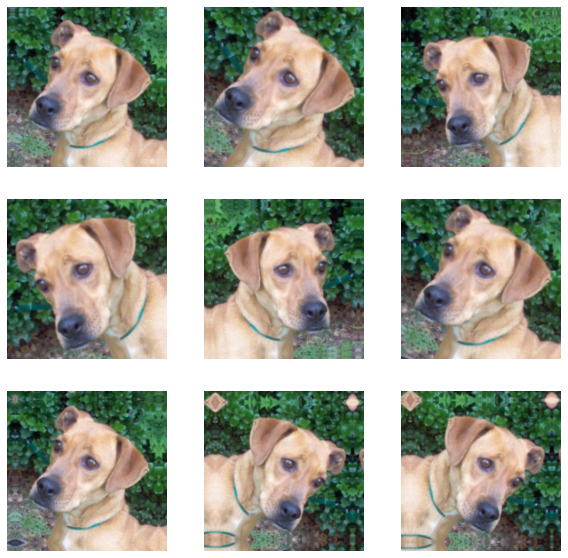

In [34]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

#創建一個新的model

In [35]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

#利用新的model進行訓練

In [36]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 8s 101ms/step - loss: 0.7136 - accuracy: 0.5185 - val_loss: 0.6924 - val_accuracy: 0.5510
Epoch 2/100
63/63 [==============================] - 7s 99ms/step - loss: 0.6977 - accuracy: 0.5375 - val_loss: 0.6948 - val_accuracy: 0.4960
Epoch 3/100
63/63 [==============================] - 6s 98ms/step - loss: 0.6919 - accuracy: 0.5580 - val_loss: 0.6652 - val_accuracy: 0.6060
Epoch 4/100
63/63 [==============================] - 6s 98ms/step - loss: 0.6806 - accuracy: 0.6220 - val_loss: 1.4789 - val_accuracy: 0.5100
Epoch 5/100
63/63 [==============================] - 6s 96ms/step - loss: 0.6518 - accuracy: 0.6405 - val_loss: 0.6371 - val_accuracy: 0.6490
Epoch 6/100
63/63 [==============================] - 7s 101ms/step - loss: 0.6329 - accuracy: 0.6520 - val_loss: 0.6224 - val_accuracy: 0.6520
Epoch 7/100
63/63 [==============================] - 7s 100ms/step - loss: 0.6236 - accuracy: 0.6445 - val_loss: 0.6251 - val_accuracy: 0.6300
Epo

#結果準確率為84%

In [37]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 39ms/step - loss: 0.4766 - accuracy: 0.8410
Test accuracy: 0.841


In [38]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


#察看結果

In [39]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [40]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 20ms/step


In [41]:
train_features.shape

(2000, 5, 5, 512)

# 訓練模型

In [42]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 13.3763 - accuracy: 0.9265 - val_loss: 2.8848 - val_accuracy: 0.9790
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 4.8106 - accuracy: 0.9705 - val_loss: 4.4231 - val_accuracy: 0.9750
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.6649 - accuracy: 0.9855 - val_loss: 4.3537 - val_accuracy: 0.9720
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 0.7432 - accuracy: 0.9910 - val_loss: 5.5959 - val_accuracy: 0.9710
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 1.0323 - accuracy: 0.9905 - val_loss: 4.7526 - val_accuracy: 0.9730
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.2213 - accuracy: 0.9980 - val_loss: 5.5679 - val_accuracy: 0.9760
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8009 - accuracy: 0.9935 - val_loss: 5.2548 - val_accuracy: 0.9760
Epoch 8/20
63/63 [

#查看訓練結果

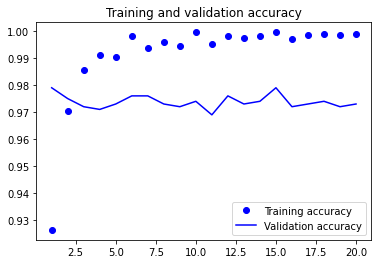

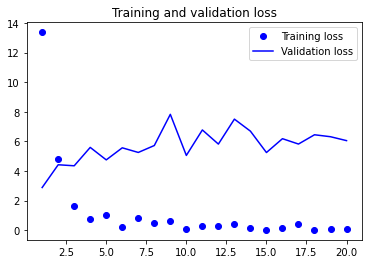

In [43]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [44]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [45]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [46]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [47]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [48]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 16s 224ms/step - loss: 19.4027 - accuracy: 0.9035 - val_loss: 3.9920 - val_accuracy: 0.9660
Epoch 2/50
63/63 [==============================] - 14s 220ms/step - loss: 7.8780 - accuracy: 0.9365 - val_loss: 3.0680 - val_accuracy: 0.9820
Epoch 3/50
63/63 [==============================] - 14s 215ms/step - loss: 6.0782 - accuracy: 0.9540 - val_loss: 3.4883 - val_accuracy: 0.9770
Epoch 4/50
63/63 [==============================] - 14s 214ms/step - loss: 5.3078 - accuracy: 0.9540 - val_loss: 3.0181 - val_accuracy: 0.9790
Epoch 5/50
63/63 [==============================] - 14s 213ms/step - loss: 3.8105 - accuracy: 0.9635 - val_loss: 4.2469 - val_accuracy: 0.9790
Epoch 6/50
63/63 [==============================] - 14s 214ms/step - loss: 2.6187 - accuracy: 0.9760 - val_loss: 3.3441 - val_accuracy: 0.9790
Epoch 7/50
63/63 [==============================] - 14s 215ms/step - loss: 2.8221 - accuracy: 0.9690 - val_loss: 2.5485 - val_accuracy: 0.982

#這個model的準確率為97%

In [49]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 8s 119ms/step - loss: 2.5844 - accuracy: 0.9775
Test accuracy: 0.978


In [50]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [51]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [52]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 17s 246ms/step - loss: 0.5249 - accuracy: 0.9900 - val_loss: 2.7606 - val_accuracy: 0.9730
Epoch 2/30
63/63 [==============================] - 16s 243ms/step - loss: 0.5048 - accuracy: 0.9900 - val_loss: 2.0303 - val_accuracy: 0.9780
Epoch 3/30
63/63 [==============================] - 15s 241ms/step - loss: 0.4105 - accuracy: 0.9885 - val_loss: 2.3896 - val_accuracy: 0.9780
Epoch 4/30
63/63 [==============================] - 15s 241ms/step - loss: 0.3475 - accuracy: 0.9920 - val_loss: 1.5653 - val_accuracy: 0.9820
Epoch 5/30
63/63 [==============================] - 15s 235ms/step - loss: 0.4593 - accuracy: 0.9920 - val_loss: 2.4109 - val_accuracy: 0.9720
Epoch 6/30
63/63 [==============================] - 15s 242ms/step - loss: 0.3784 - accuracy: 0.9890 - val_loss: 1.2580 - val_accuracy: 0.9840
Epoch 7/30
63/63 [==============================] - 15s 240ms/step - loss: 0.2512 - accuracy: 0.9915 - val_loss: 1.0665 - val_accuracy: 0.9850

In [53]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 8s 121ms/step - loss: 1.3585 - accuracy: 0.9795
Test accuracy: 0.979
